In [2]:
#initializations
import numpy as np
import platform
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray
from os import listdir
import cv2
import random
import copy

In [3]:
# load all images in a directory
#shuffle the labels and the data in Order
def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a , b

def load_directory(f_name):
    #print ("in file " + f_name)
    loaded_images = {}
    labels_list = []
    loaded_images_list = []
    for filename in listdir('flower_photos/' + f_name):
        # load image
        img_data = plt.imread('flower_photos/' + f_name + '/' + filename)
        new_img = cv2.resize(img_data,
                             dsize=(32, 32),  # 32 x 32 images
                             interpolation=cv2.INTER_CUBIC)

        loaded_images[filename] = new_img
        sorted_loaded_images = dict(
            sorted(loaded_images.items(), key=lambda x: x[0].lower()))

    for key in (sorted_loaded_images):
        labels_list.append(f_name)
        loaded_images_list.append(loaded_images[key])

    ret = np.array(loaded_images_list)
    labels = np.array(labels_list)
    testing_batch = ret[-100:]
    testing_batch_labels = labels[-100:]
    validation_batch = ret[-200:-100]
    validation_batch_labels = labels[-200:-100]
    #plt.pyplot.figure()
    #plt.pyplot.imshow(testing_batch[0])
    # print (testing_batch.shape)
    training_batch = ret[:-200].copy()
    training_batch_labels = labels[:-200].copy()
    #print(training_batch.shape)

    return testing_batch, training_batch, testing_batch_labels, training_batch_labels, validation_batch,validation_batch_labels


training_data = []
testing_data = []
training_labels = []
testing_labels = []
validation_data = []
validation_labels=[]


for directoryname in listdir('flower_photos'):
    print('in directory:' + directoryname)
    testing_batch, training_batch, testing_batch_labels, training_batch_labels,validation_batch,validation_batch_labels = load_directory(
        directoryname)
    testing_data.extend(testing_batch)
    testing_labels.extend(testing_batch_labels)
    #plt.figure()
    #plt.imshow(testing_batch[0])
    training_data.extend(training_batch)
    training_labels.extend(training_batch_labels)
    
    validation_data.extend(validation_batch)
    validation_labels.extend(validation_batch_labels)
    
    


testing_data = np.array(testing_data)
testing_data = np.reshape(testing_data , (testing_data.shape[0], -1))
training_data = np.array(training_data)
training_data = np.reshape(training_data , (training_data.shape[0], -1))
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

validation_labels = np.array(validation_labels)
validation_data = np.array (validation_data)
validation_data = np.reshape(validation_data , (validation_data.shape[0], -1))

#preprocess the data (zero centered and normalized)

'''
def load_flowers ():
    return testing_data , training_data ,training_labels, testing_labels 
'''
'''
#shuffling the data
#np.random.seed(10)  
testing_data,testing_labels=shuffle_in_unison(testing_data,testing_labels)
daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)
daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
training_data,training_labels=shuffle_in_unison(training_data,training_labels)
'''


in directory:daisy
in directory:dandelion
in directory:roses
in directory:sunflowers
in directory:tulips


'\n#shuffling the data\n#np.random.seed(10)  \ntesting_data,testing_labels=shuffle_in_unison(testing_data,testing_labels)\ndaisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)\ndaisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)\ntraining_data,training_labels=shuffle_in_unison(training_data,training_labels)\n'

In [4]:
#shuffling the data
np.random.seed(10) 

daisy,dandelion,roses,sunflowers,tulips = np.split(testing_data,5)

training_data,training_labels=shuffle_in_unison(training_data,training_labels)
validation_data,validation_labels=shuffle_in_unison(validation_data,validation_labels)


In [5]:
#print (testing_labels)
training_labels[training_labels == 'daisy'] = 0
training_labels[training_labels == 'dandelion'] = 1
training_labels[training_labels == 'roses'] = 2
training_labels[training_labels == 'sunflowers'] = 3
training_labels[training_labels == 'tulips'] = 4
#print(training_labels[:500])
#testing_labels = testing_labels.astype('int32')
testing_labels[testing_labels == 'daisy'] = 0
testing_labels[testing_labels == 'dandelion'] = 1
testing_labels[testing_labels == 'roses'] = 2
testing_labels[testing_labels == 'sunflowers'] = 3
testing_labels[testing_labels == 'tulips'] = 4

validation_labels[validation_labels == 'daisy'] = 0
validation_labels[validation_labels == 'dandelion'] = 1
validation_labels[validation_labels == 'roses'] = 2
validation_labels[validation_labels == 'sunflowers'] = 3
validation_labels[validation_labels == 'tulips'] = 4


training_labels = training_labels.astype('int32')
testing_labels = testing_labels.astype('int32')
validation_labels = validation_labels.astype('int32')

#daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
#testing_data,testing_labels=shuffle_in_unison(testing_data,testing_labels)
#print (daisy_lbls)
print (testing_labels)
print (training_labels.dtype)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [6]:
daisy_lbls,dandelion_lbls,roses_lbls,sunflowers_lbls,tulips_lbls=np.split(testing_labels,5)
print (daisy_lbls)
#testing_data,testing_labels=shuffle_in_unison(testing_data,testing_labels) #this shuffles the splitted data , be careful !!
print (daisy_lbls)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
print(testing_data.shape)
print(training_data.shape)
print(validation_data.shape)
print(training_labels.shape)
print(testing_labels.shape)
print(validation_labels.shape)

(500, 3072)
(2670, 3072)
(500, 3072)
(2670,)
(500,)
(500,)


In [9]:
print(validation_labels)

[0 2 4 2 3 4 1 1 0 2 2 3 3 4 4 2 2 4 2 1 0 2 0 2 1 4 1 0 2 3 4 0 0 1 2 1 1
 1 3 4 0 4 0 2 2 3 2 1 4 0 1 1 1 4 4 4 1 1 3 2 4 2 1 3 4 2 4 2 3 1 1 1 2 0
 3 0 3 0 1 4 1 3 2 2 1 3 3 3 1 4 0 4 3 0 4 2 4 0 0 0 4 2 2 1 1 0 0 3 4 3 0
 2 0 3 3 3 0 3 4 3 1 2 0 2 4 0 1 3 4 2 3 4 4 1 1 2 2 0 1 0 4 1 4 3 1 1 0 0
 0 3 2 1 3 2 2 3 0 0 2 3 0 4 4 2 2 2 1 0 3 3 2 2 4 0 4 0 3 2 4 0 3 3 2 3 0
 3 3 3 4 4 3 3 4 1 4 0 0 4 4 0 3 2 2 2 4 4 4 4 2 2 2 1 2 0 0 2 4 1 1 2 4 4
 0 0 3 1 4 3 4 2 1 4 3 4 1 2 4 4 0 1 0 1 1 0 2 3 2 2 0 1 1 1 0 1 4 1 0 1 4
 0 1 4 4 2 1 1 1 2 2 3 0 1 1 0 3 4 4 1 3 3 2 0 0 3 2 3 0 3 4 2 1 2 3 0 4 1
 3 4 0 4 0 3 1 0 4 4 1 4 1 1 2 0 4 4 2 3 3 1 2 0 4 2 3 2 0 0 2 3 2 0 3 2 3
 0 0 0 3 0 4 3 0 1 3 1 1 2 1 0 0 2 4 2 4 1 0 4 1 4 0 0 0 3 2 4 3 1 3 3 1 4
 2 4 3 1 0 0 1 1 4 1 2 0 3 2 1 3 4 1 2 3 4 4 3 1 4 4 3 3 2 3 1 1 0 3 3 1 0
 4 0 4 1 4 2 3 2 3 3 3 2 1 0 4 1 2 2 0 0 0 3 2 0 2 3 0 2 1 1 2 1 3 4 0 2 1
 2 4 0 4 3 1 3 4 0 3 3 1 4 4 0 2 3 1 2 1 0 0 2 0 1 2 4 2 3 1 3 1 0 4 0 3 2
 2 3 3 2 1 1 0 2 4 0 4 4 

# Training a linear classifier to solve the problem as a start

In [10]:
#some useful constants
w = 32 #image dimenstion
K = 5 #number of classes
D = w * w * 3 # Dimensionality 
print (D)

3072


In [ ]:
#Train a Linear Classifier

# initialize parameters randomly
W =  np.random.randn(D,K)/ np.sqrt(D) #xavier
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-6 # regularization strength

X = training_data.astype('float64')
y = training_labels

#preprocess the data
X -= np.mean (X , axis = 0 )
#X = X.astype('float')
#print (training_data.shape)
X /= np.std (X , axis = 0 )
X/= 255.0

print (X)
# gradient descent loop
num_examples = training_data.shape[0]
all_loss=[]
for i in range(10000):

    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b
    #print(scores)

    # compute the class probabilities
    exp_scores = np.exp(scores)
    #print (exp_scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    all_loss.append(loss)
    if i % 1000 == 0:
        print ("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg*W # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

In [ ]:
#print (np.std(X, axis=0))
plt.plot(all_loss)
plt.title('Loss')
plt.show()

In [ ]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

In [ ]:
# evaluate validation set accuracy
validation_data = validation_data.astype('float64')
#validation_data -= np.mean(validation_data , axis = 0)
#validation_data /= np.std(validation_data , axis = 0)

scores = np.dot(validation_data, W) + b
predicted_class = np.argmax(scores, axis=1)
print(predicted_class[:10])
print (validation_labels [:10])
print ('validation_set accuracy: %.2f' % (np.mean(predicted_class == validation_labels)))

## Implementing Two hidden layer network

In [ ]:
#initialize the weights using xavier initializer
n_in = D
h_1 = 1000 #nodes in the first hidden layer
h_2 = 1000 #node in the second hidden layer"
n_out = K

In [11]:
Best_W = np.array([])
Best_W2 = np.array([])
Best_W3 =np.array([])
Best_b = np.array([])
Best_b2 = np.array([])
Best_b3 = np.array([])
Best_val_acc = 0


In [25]:
#max_count = 100
#for count in range (max_count):
    #print('search space iteration ( %d / 100)' %(count))
#reg = 10**random.uniform(-4,0)
#learning_rate = 10**random.uniform(-3,-6) # regularization strength
reg = 1e-3 
learning_rate = 5e-2
# initialize parameters randomly
h1 = 1000 # size of hidden layer 1
h2 = 1000 #size of hidden layer 2 
W = np.random.randn(D,h1)/ np.sqrt(D) #xavier
b = np.zeros((1,h1))
#print(b.shape)
W2 = np.random.randn(h1,h2)/ np.sqrt(h1)
b2 = np.zeros((1,h2))
W3= np.random.randn(h2,K)/ np.sqrt(h2)
b3=np.zeros((1,K))

#preprocess the data
X = training_data.astype('float64')
y = training_labels


X -= np.mean (X , axis = 0 )
#X = X.astype('float')
#print (training_data.shape)
#X /= np.std (X , axis = 0 )
X/= 255.0

validation_d = validation_data.astype('float64')
validation_d -= np.mean (validation_data , axis = 0 )
#validation_data /= np.std (validation_data , axis = 0 )
validation_d /= 255.0

# some hyperparameters



# gradient descent loop
num_examples = X.shape[0]
all_loss=[]
all_validation_loss = []
prev_val_acc = 0
for i in range(500): #100 epochs

  # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    hidden_layer2= np.maximum(0, np.dot(hidden_layer, W2) + b2) # note, ReLU activation
    scores = np.dot(hidden_layer2, W3) + b3
    training_predicted_class = np.argmax(scores, axis=1)
    training_acc = np.mean(training_predicted_class == y)

    #evaluate validation accuracy

    validation_hidden_layer = np.maximum(0, np.dot(validation_d, W) + b) # note, ReLU activation
    validation_hidden_layer2= np.maximum(0, np.dot(validation_hidden_layer, W2) + b2) # note, ReLU activation
    validation_scores = np.dot(validation_hidden_layer2, W3) + b3

    validation_predicted_class = np.argmax(validation_scores, axis=1)
    validation_acc = np.mean(validation_predicted_class == validation_labels)

    # compute the class probabilities
    scores -= np.max(scores) # to avoid numerical blowup
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3) 
    loss = data_loss + reg_loss
    all_loss.append(loss)

    # compute validation scores 
    validation_scores -= np.max(validation_scores) # to avoid numerical blowup
    exp_validation_scores = np.exp(validation_scores)
    '''
    try:
        validation_probs = exp_validation_scores / np.sum(exp_validation_scores, axis=1, keepdims=True)
    except ZeroDivisionError:
        print('division by zero')
    finally:
        validation_probs = exp_validation_scores / 1e-12
    '''
    validation_probs = exp_validation_scores / np.sum(exp_validation_scores, axis=1, keepdims=True) # [N x K]
    #print (validation_probs.shape)

    #compute validation loss
    validation_num_examples = validation_data.shape[0]
    validation_correct_logprobs = -np.log(validation_probs[range(validation_num_examples),validation_labels])
    #print (validation_correct_logprobs.shape)
    validation_data_loss = np.sum(validation_correct_logprobs)/validation_num_examples
    #reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3) 
    validation_loss = validation_data_loss + reg_loss
    all_validation_loss.append(validation_loss)

    #if i % 10 == 0:
    print ("Epoch %d:Tr_loss: %f, val_loss: %f ,Tr_acc: %f , val_acc: %f , lr: %f , Reg:%f" % (i, loss , validation_loss , training_acc , validation_acc , learning_rate , reg ))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    #first backprop into parameters W3 and b3
    dW3 = np.dot (hidden_layer2.T , dscores)
    db3 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer 2
    dhidden_2 = np.dot(dscores, W3.T)
    # backprop the ReLU non-linearity
    dhidden_2[hidden_layer2 <= 0] = 0
    # next backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dhidden_2)
    db2 = np.sum(dhidden_2, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dhidden_2, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW3 += reg * W3
    dW2 += reg * W2
    dW += reg * W
    
    #assigning the values 
    if (validation_acc > prev_val_acc):
        prev_val_acc = validation_acc
        Best_W = copy.deepcopy(W)
        Best_W2 = copy.deepcopy(W2)
        Best_W3 = copy.deepcopy(W3)
        Best_b = copy.deepcopy(b)
        Best_b2 = copy.deepcopy(b2)
        Best_b3 = copy.deepcopy(b3)
        Best_val_acc = copy.deepcopy(validation_acc)

    # perform a parameter update
    W += -learning_rate * dW
    b += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2
    W3 += -learning_rate * dW3
    b3 += -learning_rate * db3

Epoch 0:Tr_loss: 2.607574, val_loss: 2.626760 ,Tr_acc: 0.261798 , val_acc: 0.236000 , lr: 0.050000 , Reg:0.001000
Epoch 1:Tr_loss: 2.595534, val_loss: 2.619260 ,Tr_acc: 0.294382 , val_acc: 0.260000 , lr: 0.050000 , Reg:0.001000
Epoch 2:Tr_loss: 2.584628, val_loss: 2.612244 ,Tr_acc: 0.314607 , val_acc: 0.264000 , lr: 0.050000 , Reg:0.001000
Epoch 3:Tr_loss: 2.574565, val_loss: 2.605531 ,Tr_acc: 0.323221 , val_acc: 0.268000 , lr: 0.050000 , Reg:0.001000
Epoch 4:Tr_loss: 2.565134, val_loss: 2.598995 ,Tr_acc: 0.337453 , val_acc: 0.270000 , lr: 0.050000 , Reg:0.001000
Epoch 5:Tr_loss: 2.556190, val_loss: 2.592579 ,Tr_acc: 0.340449 , val_acc: 0.276000 , lr: 0.050000 , Reg:0.001000
Epoch 6:Tr_loss: 2.547631, val_loss: 2.586241 ,Tr_acc: 0.350187 , val_acc: 0.288000 , lr: 0.050000 , Reg:0.001000
Epoch 7:Tr_loss: 2.539374, val_loss: 2.579949 ,Tr_acc: 0.358052 , val_acc: 0.290000 , lr: 0.050000 , Reg:0.001000
Epoch 8:Tr_loss: 2.531373, val_loss: 2.573708 ,Tr_acc: 0.364794 , val_acc: 0.290000 , lr

Epoch 72:Tr_loss: 2.184014, val_loss: 2.305014 ,Tr_acc: 0.544944 , val_acc: 0.456000 , lr: 0.050000 , Reg:0.001000
Epoch 73:Tr_loss: 2.180386, val_loss: 2.302912 ,Tr_acc: 0.546816 , val_acc: 0.460000 , lr: 0.050000 , Reg:0.001000
Epoch 74:Tr_loss: 2.176800, val_loss: 2.300856 ,Tr_acc: 0.547566 , val_acc: 0.458000 , lr: 0.050000 , Reg:0.001000
Epoch 75:Tr_loss: 2.173255, val_loss: 2.298847 ,Tr_acc: 0.548315 , val_acc: 0.464000 , lr: 0.050000 , Reg:0.001000
Epoch 76:Tr_loss: 2.169749, val_loss: 2.296877 ,Tr_acc: 0.550562 , val_acc: 0.462000 , lr: 0.050000 , Reg:0.001000
Epoch 77:Tr_loss: 2.166282, val_loss: 2.294948 ,Tr_acc: 0.552060 , val_acc: 0.464000 , lr: 0.050000 , Reg:0.001000
Epoch 78:Tr_loss: 2.162855, val_loss: 2.293066 ,Tr_acc: 0.554682 , val_acc: 0.464000 , lr: 0.050000 , Reg:0.001000
Epoch 79:Tr_loss: 2.159465, val_loss: 2.291225 ,Tr_acc: 0.556554 , val_acc: 0.464000 , lr: 0.050000 , Reg:0.001000
Epoch 80:Tr_loss: 2.156110, val_loss: 2.289429 ,Tr_acc: 0.556180 , val_acc: 0.46

Epoch 143:Tr_loss: 1.985690, val_loss: 2.224734 ,Tr_acc: 0.635206 , val_acc: 0.502000 , lr: 0.050000 , Reg:0.001000
Epoch 144:Tr_loss: 1.983287, val_loss: 2.224133 ,Tr_acc: 0.637828 , val_acc: 0.502000 , lr: 0.050000 , Reg:0.001000
Epoch 145:Tr_loss: 1.980887, val_loss: 2.223536 ,Tr_acc: 0.638202 , val_acc: 0.502000 , lr: 0.050000 , Reg:0.001000
Epoch 146:Tr_loss: 1.978487, val_loss: 2.222952 ,Tr_acc: 0.640824 , val_acc: 0.502000 , lr: 0.050000 , Reg:0.001000
Epoch 147:Tr_loss: 1.976089, val_loss: 2.222375 ,Tr_acc: 0.641199 , val_acc: 0.500000 , lr: 0.050000 , Reg:0.001000
Epoch 148:Tr_loss: 1.973691, val_loss: 2.221801 ,Tr_acc: 0.641948 , val_acc: 0.502000 , lr: 0.050000 , Reg:0.001000
Epoch 149:Tr_loss: 1.971294, val_loss: 2.221236 ,Tr_acc: 0.643446 , val_acc: 0.502000 , lr: 0.050000 , Reg:0.001000
Epoch 150:Tr_loss: 1.968898, val_loss: 2.220681 ,Tr_acc: 0.645693 , val_acc: 0.502000 , lr: 0.050000 , Reg:0.001000
Epoch 151:Tr_loss: 1.966504, val_loss: 2.220133 ,Tr_acc: 0.646816 , val_

Epoch 214:Tr_loss: 1.814491, val_loss: 2.194162 ,Tr_acc: 0.741199 , val_acc: 0.516000 , lr: 0.050000 , Reg:0.001000
Epoch 215:Tr_loss: 1.812023, val_loss: 2.193885 ,Tr_acc: 0.741573 , val_acc: 0.518000 , lr: 0.050000 , Reg:0.001000
Epoch 216:Tr_loss: 1.809554, val_loss: 2.193591 ,Tr_acc: 0.743446 , val_acc: 0.516000 , lr: 0.050000 , Reg:0.001000
Epoch 217:Tr_loss: 1.807083, val_loss: 2.193323 ,Tr_acc: 0.745693 , val_acc: 0.520000 , lr: 0.050000 , Reg:0.001000
Epoch 218:Tr_loss: 1.804609, val_loss: 2.193028 ,Tr_acc: 0.746816 , val_acc: 0.520000 , lr: 0.050000 , Reg:0.001000
Epoch 219:Tr_loss: 1.802135, val_loss: 2.192755 ,Tr_acc: 0.747566 , val_acc: 0.520000 , lr: 0.050000 , Reg:0.001000
Epoch 220:Tr_loss: 1.799659, val_loss: 2.192477 ,Tr_acc: 0.749064 , val_acc: 0.520000 , lr: 0.050000 , Reg:0.001000
Epoch 221:Tr_loss: 1.797181, val_loss: 2.192210 ,Tr_acc: 0.750562 , val_acc: 0.520000 , lr: 0.050000 , Reg:0.001000
Epoch 222:Tr_loss: 1.794700, val_loss: 2.191938 ,Tr_acc: 0.751685 , val_

Epoch 285:Tr_loss: 1.635377, val_loss: 2.182015 ,Tr_acc: 0.832959 , val_acc: 0.522000 , lr: 0.050000 , Reg:0.001000
Epoch 286:Tr_loss: 1.632838, val_loss: 2.181983 ,Tr_acc: 0.834082 , val_acc: 0.522000 , lr: 0.050000 , Reg:0.001000
Epoch 287:Tr_loss: 1.630301, val_loss: 2.181966 ,Tr_acc: 0.834082 , val_acc: 0.522000 , lr: 0.050000 , Reg:0.001000
Epoch 288:Tr_loss: 1.627765, val_loss: 2.181927 ,Tr_acc: 0.836330 , val_acc: 0.524000 , lr: 0.050000 , Reg:0.001000
Epoch 289:Tr_loss: 1.625231, val_loss: 2.181910 ,Tr_acc: 0.837079 , val_acc: 0.524000 , lr: 0.050000 , Reg:0.001000
Epoch 290:Tr_loss: 1.622697, val_loss: 2.181892 ,Tr_acc: 0.838202 , val_acc: 0.524000 , lr: 0.050000 , Reg:0.001000
Epoch 291:Tr_loss: 1.620165, val_loss: 2.181883 ,Tr_acc: 0.838951 , val_acc: 0.524000 , lr: 0.050000 , Reg:0.001000
Epoch 292:Tr_loss: 1.617633, val_loss: 2.181887 ,Tr_acc: 0.840075 , val_acc: 0.522000 , lr: 0.050000 , Reg:0.001000
Epoch 293:Tr_loss: 1.615103, val_loss: 2.181883 ,Tr_acc: 0.840824 , val_

Epoch 356:Tr_loss: 1.461417, val_loss: 2.191932 ,Tr_acc: 0.905243 , val_acc: 0.510000 , lr: 0.050000 , Reg:0.001000
Epoch 357:Tr_loss: 1.459112, val_loss: 2.192683 ,Tr_acc: 0.907116 , val_acc: 0.512000 , lr: 0.050000 , Reg:0.001000
Epoch 358:Tr_loss: 1.456813, val_loss: 2.192592 ,Tr_acc: 0.908614 , val_acc: 0.510000 , lr: 0.050000 , Reg:0.001000
Epoch 359:Tr_loss: 1.454520, val_loss: 2.193360 ,Tr_acc: 0.908989 , val_acc: 0.510000 , lr: 0.050000 , Reg:0.001000
Epoch 360:Tr_loss: 1.452234, val_loss: 2.193248 ,Tr_acc: 0.909738 , val_acc: 0.510000 , lr: 0.050000 , Reg:0.001000
Epoch 361:Tr_loss: 1.449952, val_loss: 2.194027 ,Tr_acc: 0.910861 , val_acc: 0.512000 , lr: 0.050000 , Reg:0.001000
Epoch 362:Tr_loss: 1.447677, val_loss: 2.193928 ,Tr_acc: 0.911985 , val_acc: 0.512000 , lr: 0.050000 , Reg:0.001000
Epoch 363:Tr_loss: 1.445407, val_loss: 2.194706 ,Tr_acc: 0.911610 , val_acc: 0.512000 , lr: 0.050000 , Reg:0.001000
Epoch 364:Tr_loss: 1.443142, val_loss: 2.194590 ,Tr_acc: 0.913483 , val_

Epoch 427:Tr_loss: 1.313709, val_loss: 2.226288 ,Tr_acc: 0.956554 , val_acc: 0.518000 , lr: 0.050000 , Reg:0.001000
Epoch 428:Tr_loss: 1.311887, val_loss: 2.225542 ,Tr_acc: 0.956554 , val_acc: 0.520000 , lr: 0.050000 , Reg:0.001000
Epoch 429:Tr_loss: 1.310071, val_loss: 2.227543 ,Tr_acc: 0.957678 , val_acc: 0.516000 , lr: 0.050000 , Reg:0.001000
Epoch 430:Tr_loss: 1.308261, val_loss: 2.226727 ,Tr_acc: 0.957678 , val_acc: 0.518000 , lr: 0.050000 , Reg:0.001000
Epoch 431:Tr_loss: 1.306460, val_loss: 2.228820 ,Tr_acc: 0.958052 , val_acc: 0.516000 , lr: 0.050000 , Reg:0.001000
Epoch 432:Tr_loss: 1.304669, val_loss: 2.227937 ,Tr_acc: 0.958427 , val_acc: 0.518000 , lr: 0.050000 , Reg:0.001000
Epoch 433:Tr_loss: 1.302880, val_loss: 2.230123 ,Tr_acc: 0.959176 , val_acc: 0.516000 , lr: 0.050000 , Reg:0.001000
Epoch 434:Tr_loss: 1.301103, val_loss: 2.229147 ,Tr_acc: 0.958801 , val_acc: 0.518000 , lr: 0.050000 , Reg:0.001000
Epoch 435:Tr_loss: 1.299332, val_loss: 2.231402 ,Tr_acc: 0.959551 , val_

KeyboardInterrupt: 

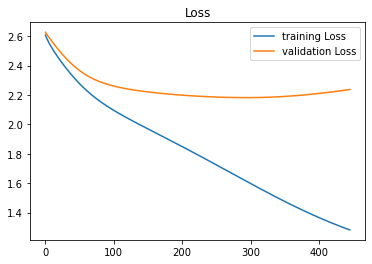

In [26]:
plt.plot(all_loss ,label = 'training Loss')
plt.plot (all_validation_loss , label='validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [ ]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
hidden_layer2= np.maximum(0, np.dot(hidden_layer, W2) + b2) # note, ReLU activation
scores = np.dot(hidden_layer2, W3) + b3

predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

In [ ]:
# evaluate validation set accuracy
validation_data = validation_data.astype('float64')
#validation_data -= np.mean(validation_data , axis = 0)
#validation_data /= np.std(validation_data , axis = 0)
#print (Best_W.shape)
#print (Best_W2.shape)
#print(Best_val_acc)
hidden_layer = np.maximum(0, np.dot(validation_data, Best_W) + Best_b) # note, ReLU activation
hidden_layer2= np.maximum(0, np.dot(hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
scores = np.dot(hidden_layer2, Best_W3) + Best_b3

print(Best_val_acc)
predicted_class = np.argmax(scores, axis=1)
#print(predicted_class[:10])
#print (validation_labels [:10])
print ('validation_set accuracy: %.2f' % (np.mean(predicted_class == validation_labels)))

In [ ]:
r = 0 
theta = 0 
try:
    n = r / theta
except ZeroDivisionError:
    print('division by zero')
finally:
    n = 1
    
print (n)

In [27]:
#running test set and calculating the ACCR
testing_d = testing_data.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('testing ACCR: %.2f ' % (np.mean(predicted_class == testing_labels)*100) +'%')

testing ACCR: 55.40 %


In [28]:
#calculating individual classes and calculating the CCRNA
#daisy
testing_d = daisy.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('Daisy accuracy: %.2f ' % (np.mean(predicted_class == daisy_lbls)*100) +'%')

Daisy accuracy: 41.00 %


In [29]:
#calculating individual classes and calculating the CCRNA
#dandelion
testing_d = dandelion.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('dandelion accuracy: %.2f ' % (np.mean(predicted_class == dandelion_lbls)*100) +'%')

dandelion accuracy: 70.00 %


In [30]:
#calculating individual classes and calculating the CCRNA
#roses
testing_d = roses.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('roses accuracy: %.2f ' % (np.mean(predicted_class == roses_lbls)*100) +'%')

roses accuracy: 38.00 %


In [31]:
#calculating individual classes and calculating the CCRNA
#sunflowers
testing_d = sunflowers.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('sunflowers accuracy: %.2f ' % (np.mean(predicted_class == sunflowers_lbls)*100) +'%')

sunflowers accuracy: 71.00 %


In [32]:
#calculating individual classes and calculating the CCRNA
#tulips
testing_d = tulips.astype('float64')
testing_d -= np.mean (testing_data , axis = 0)
testing_d /= 255.0
testing_hidden_layer = np.maximum(0, np.dot(testing_d, Best_W) + Best_b) # note, ReLU activation
testing_hidden_layer2= np.maximum(0, np.dot(testing_hidden_layer, Best_W2) + Best_b2) # note, ReLU activation
testing_scores = np.dot(testing_hidden_layer2, Best_W3) + Best_b3

predicted_class = np.argmax(testing_scores, axis=1)

print ('tulips accuracy: %.2f ' % (np.mean(predicted_class == tulips_lbls)*100) +'%')

tulips accuracy: 57.00 %


In [74]:
#changing the class to be more dynamic in terms of (number of layers / number of nodes in each layer /Activation functions ..)
# To Do : Add more activation functions and gradient flavors
class fully_connected ():
    def __init__ (self,n_layers):
        self.n_layers= n_layers
        self.h = []
        self.Best_W = {} #dictionary that has all the best W
        self.Best_b = {} # dictionary that has the best Bias 
        self.Best_val_acc = 0
    
    def set_layers_nodes (self,h): #h is a numpy array of length n_layer , prints an error message if not
        if (len(h) != self.n_layers):
            print('the length of the node number array is not compatible with the number of hidden layers')
        else:
            self.h = h
    
    def compute(self,training_data = training_data , training_labels = training_labels ,
                validation_data = validation_data , validation_labels = validation_labels,
                D=3072 , K=5 , lr = 1e-0 , reg = 1e-3 , epochs = 100):
        n_layers = self.n_layers
        reg = reg
        learning_rate = lr
        h = self.h
        weights = {}
        bias = {}
        
        weights[0] = np.random.randn(D,h[0])/ np.sqrt(D)
        bias[0]= np.zeros((1,h[0]))
        weights[n_layers]= np.random.randn(h[n_layers-1], K)/ np.sqrt(h[n_layers-1])
        bias[n_layers]= np.zeros((1,K))
        
        # initialize parameters randomly
        for i in range (1,n_layers):
            weights[i] = np.random.randn(h[i-1],h[i])/ np.sqrt(h[i-1])
            bias[i]= np.zeros((1,h[i]))
        
        #weights = weights.transpose(2,0,1)
        #bias = bias.transpose(2,0,1)
        #print (weights.shape)
        #print (bias.shape)
        '''
        h1 = 1000 # size of hidden layer 1
        h2 = 1000 #size of hidden layer 2 
        W = np.random.randn(D,h1)/ np.sqrt(D) #xavier
        b = np.zeros((1,h1))
        W2 = np.random.randn(h1,h2)/ np.sqrt(h1)
        b2 = np.zeros((1,h2))
        W3= np.random.randn(h2,K)/ np.sqrt(h2)
        b3=np.zeros((1,K))
        '''
        #preprocess the data
        X = training_data.astype('float64')
        y = training_labels


        X -= np.mean (X , axis = 0 )
        #X = X.astype('float')
        #print (training_data.shape)
        #X /= np.std (X , axis = 0 )
        X/= 255.0

        validation_d = validation_data.astype('float64')
        validation_d -= np.mean (validation_data , axis = 0 )
        #validation_data /= np.std (validation_data , axis = 0 )
        validation_d /= 255.0

        # some hyperparameters



        # gradient descent loop
        num_examples = X.shape[0]
        all_loss=[]
        all_validation_loss = []
        prev_val_acc = 0
        hidden_layers= {}
        hidden_layers[0] = np.maximum(0, np.dot(X, weights[0]) + bias[0])
        validation_hidden_layers={}
        for epoch in range(epochs): #10 epochs

          # evaluate class scores, [N x K]
            #hidden_layers= np.append(hidden_layers,()
            for i in range (1 , n_layers):
                tmp_h = np.maximum(0, np.dot(hidden_layers[i-1], weights[i]) + bias[i])
                #print (tmp_h.shape)
                hidden_layers[i] =  tmp_h
            #hidden_layers = hidden_layers.transpose(2,0,1)
            #print (hidden_layers.shape)
                
                                     
            '''
            #hidden_layer = np.maximum(0, np.dot(X, weights[]) + b) # note, ReLU activation
            #hidden_layer2= np.maximum(0, np.dot(hidden_layer, W2) + b2) # note, ReLU activation
            '''
            scores = np.dot(hidden_layers[n_layers-1], weights[n_layers]) + bias[n_layers]
            training_predicted_class = np.argmax(scores, axis=1)
            training_acc = np.mean(training_predicted_class == y)
            
            validation_hidden_layers[0]= np.maximum(0, np.dot(validation_d, weights[0]) + bias[0]) # note, ReLU activation
            #evaluate validation accuracy
            for i in range (1 , n_layers):
                validation_hidden_layers[i]= np.maximum(0, np.dot(validation_hidden_layers[i-1], weights[i]) + bias[i])
            
            #validation_hidden_layer2= np.maximum(0, np.dot(validation_hidden_layer, W2) + b2) # note, ReLU activation
            validation_scores = np.dot(validation_hidden_layers[n_layers-1], weights[n_layers]) + bias[n_layers]

            validation_predicted_class = np.argmax(validation_scores, axis=1)
            validation_acc = np.mean(validation_predicted_class == validation_labels)

            # compute the class probabilities
            scores -= np.max(scores) # to avoid numerical blowup
            exp_scores = np.exp(scores)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

            # compute the loss: average cross-entropy loss and regularization
            correct_logprobs = -np.log(probs[range(num_examples),y])
            data_loss = np.sum(correct_logprobs)/num_examples
            reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3) 
            loss = data_loss + reg_loss
            all_loss.append(loss)

            # compute validation scores 
            validation_scores -= np.max(validation_scores) # to avoid numerical blowup
            exp_validation_scores = np.exp(validation_scores)
            '''
            try:
                validation_probs = exp_validation_scores / np.sum(exp_validation_scores, axis=1, keepdims=True)
            except ZeroDivisionError:
                print('division by zero')
            finally:
                validation_probs = exp_validation_scores / 1e-12
            '''
            validation_probs = exp_validation_scores / np.sum(exp_validation_scores, axis=1, keepdims=True) # [N x K]
            #print (validation_probs.shape)

            #compute validation loss
            validation_num_examples = validation_data.shape[0]
            validation_correct_logprobs = -np.log(validation_probs[range(validation_num_examples),validation_labels])
            #print (validation_correct_logprobs.shape)
            validation_data_loss = np.sum(validation_correct_logprobs)/validation_num_examples
            #reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2) + 0.5*reg*np.sum(W3*W3) 
            validation_loss = validation_data_loss + reg_loss
            all_validation_loss.append(validation_loss)

            #if i % 10 == 0:
            print ("Epoch %d:Tr_loss: %f, val_loss: %f ,Tr_acc: %f , val_acc: %f , lr: %f , Reg:%f" % (epoch, loss , validation_loss , training_acc , validation_acc , learning_rate , reg ))

            # compute the gradient on scores
            dscores = probs
            dscores[range(num_examples),y] -= 1
            dscores /= num_examples
            
            dweights = {}
            dbias = {}
            dhidden = {}
            # backpropate the gradient to the parameters
            #first backprop into parameters W3 and b3
            dweights[n_layers] = (np.dot (hidden_layers[n_layers-1].T , dscores))
            dbias[n_layers] = (np.sum(dscores, axis=0, keepdims=True))
            dhidden[n_layers-1] =(np.dot(dscores , weights[n_layers].T))
            if (hidden_layer[n_layers-1].any() <= 0):
                dhidden[n_layers-1] = 0
            for i in reversed(range (1,n_layers)):
                dweights[i] =np.dot (hidden_layers[i-1].T , dhidden[i]) 
                dbias[i]=np.sum(dhidden[i], axis=0, keepdims=True)
                dhidden[i-1] = np.dot(dhidden[i], weights[i].T)
                if(hidden_layers[i-1].any()<=0):
                    dhidden[i-1]=0
            
            dweights[0]= np.dot(X.T , dhidden[0])
            dbias[0]=np.sum(dhidden[0] , axis = 0 , keepdims=True)
            
            '''
            dW3 = np.dot (hidden_layer2.T , dscores)
            db3 = np.sum(dscores, axis=0, keepdims=True)
            # next backprop into hidden layer 2
            dhidden_2 = np.dot(dscores, W3.T)
            # backprop the ReLU non-linearity
            dhidden_2[hidden_layer2 <= 0] = 0
            # next backprop into parameters W2 and b2
            dW2 = np.dot(hidden_layer.T, dhidden_2)
            db2 = np.sum(dhidden_2, axis=0, keepdims=True)
            # next backprop into hidden layer
            dhidden = np.dot(dhidden_2, W2.T)
            # backprop the ReLU non-linearity
            dhidden[hidden_layer <= 0] = 0
            # finally into W,b
            dW = np.dot(X.T, dhidden)
            db = np.sum(dhidden, axis=0, keepdims=True)
            '''

            # add regularization gradient contribution
            for i in range ( 0 , n_layers+1):
            
                dweights[i] += reg * weights[i]
            #dW2 += reg * W2
            #dW += reg * W

            #assigning the values 
            if (validation_acc > prev_val_acc):
                prev_val_acc = validation_acc
                Best_W = copy.deepcopy(weights)
                #Best_W2 = copy.deepcopy(W2)
                #Best_W3 = copy.deepcopy(W3)
                Best_b = copy.deepcopy(bias)
                #Best_b2 = copy.deepcopy(b2)
                #Best_b3 = copy.deepcopy(b3)
                Best_val_acc = copy.deepcopy(validation_acc)

            # perform a parameter update
            for  i in range (0 , n_layers +1 ):
                weights[i] += -learning_rate * dweights[i]
                bias[i] += -learning_rate * dbias[i]
            #W += -learning_rate * dW
            #b += -learning_rate * db
            #W2 += -learning_rate * dW2
            #b2 += -learning_rate * db2
            #W3 += -learning_rate * dW3
            #b3 += -learning_rate * db3





In [73]:
#Testing the dynamic class
r = fully_connected (2)
r.set_layers_nodes ([1000,1000])
r.compute(lr= 6e-03 , epochs = 200)


Epoch 0:Tr_loss: 2.623160, val_loss: 2.611978 ,Tr_acc: 0.159176 , val_acc: 0.208000 , lr: 0.006000 , Reg:0.001000
Epoch 1:Tr_loss: 2.621443, val_loss: 2.609308 ,Tr_acc: 0.160300 , val_acc: 0.216000 , lr: 0.006000 , Reg:0.001000
Epoch 2:Tr_loss: 2.619782, val_loss: 2.606690 ,Tr_acc: 0.159925 , val_acc: 0.216000 , lr: 0.006000 , Reg:0.001000
Epoch 3:Tr_loss: 2.618176, val_loss: 2.604124 ,Tr_acc: 0.159551 , val_acc: 0.220000 , lr: 0.006000 , Reg:0.001000
Epoch 4:Tr_loss: 2.616620, val_loss: 2.601611 ,Tr_acc: 0.160674 , val_acc: 0.216000 , lr: 0.006000 , Reg:0.001000
Epoch 5:Tr_loss: 2.615114, val_loss: 2.599151 ,Tr_acc: 0.160300 , val_acc: 0.222000 , lr: 0.006000 , Reg:0.001000
Epoch 6:Tr_loss: 2.613653, val_loss: 2.596736 ,Tr_acc: 0.161423 , val_acc: 0.228000 , lr: 0.006000 , Reg:0.001000
Epoch 7:Tr_loss: 2.612237, val_loss: 2.594366 ,Tr_acc: 0.164045 , val_acc: 0.232000 , lr: 0.006000 , Reg:0.001000
Epoch 8:Tr_loss: 2.610862, val_loss: 2.592041 ,Tr_acc: 0.162921 , val_acc: 0.244000 , lr

Epoch 72:Tr_loss: 2.561998, val_loss: 2.495080 ,Tr_acc: 0.285768 , val_acc: 0.322000 , lr: 0.006000 , Reg:0.001000
Epoch 73:Tr_loss: 2.561493, val_loss: 2.494049 ,Tr_acc: 0.287266 , val_acc: 0.322000 , lr: 0.006000 , Reg:0.001000
Epoch 74:Tr_loss: 2.560991, val_loss: 2.493030 ,Tr_acc: 0.288015 , val_acc: 0.322000 , lr: 0.006000 , Reg:0.001000
Epoch 75:Tr_loss: 2.560491, val_loss: 2.492019 ,Tr_acc: 0.288015 , val_acc: 0.322000 , lr: 0.006000 , Reg:0.001000
Epoch 76:Tr_loss: 2.559994, val_loss: 2.491019 ,Tr_acc: 0.288764 , val_acc: 0.322000 , lr: 0.006000 , Reg:0.001000
Epoch 77:Tr_loss: 2.559501, val_loss: 2.490026 ,Tr_acc: 0.289139 , val_acc: 0.324000 , lr: 0.006000 , Reg:0.001000
Epoch 78:Tr_loss: 2.559009, val_loss: 2.489041 ,Tr_acc: 0.289513 , val_acc: 0.328000 , lr: 0.006000 , Reg:0.001000
Epoch 79:Tr_loss: 2.558521, val_loss: 2.488067 ,Tr_acc: 0.289513 , val_acc: 0.328000 , lr: 0.006000 , Reg:0.001000
Epoch 80:Tr_loss: 2.558035, val_loss: 2.487101 ,Tr_acc: 0.291011 , val_acc: 0.32

Epoch 143:Tr_loss: 2.530714, val_loss: 2.440563 ,Tr_acc: 0.327715 , val_acc: 0.338000 , lr: 0.006000 , Reg:0.001000
Epoch 144:Tr_loss: 2.530315, val_loss: 2.440014 ,Tr_acc: 0.328464 , val_acc: 0.338000 , lr: 0.006000 , Reg:0.001000
Epoch 145:Tr_loss: 2.529918, val_loss: 2.439469 ,Tr_acc: 0.329588 , val_acc: 0.340000 , lr: 0.006000 , Reg:0.001000
Epoch 146:Tr_loss: 2.529522, val_loss: 2.438930 ,Tr_acc: 0.329213 , val_acc: 0.338000 , lr: 0.006000 , Reg:0.001000
Epoch 147:Tr_loss: 2.529126, val_loss: 2.438396 ,Tr_acc: 0.329588 , val_acc: 0.338000 , lr: 0.006000 , Reg:0.001000
Epoch 148:Tr_loss: 2.528731, val_loss: 2.437867 ,Tr_acc: 0.329963 , val_acc: 0.336000 , lr: 0.006000 , Reg:0.001000
Epoch 149:Tr_loss: 2.528337, val_loss: 2.437342 ,Tr_acc: 0.329963 , val_acc: 0.334000 , lr: 0.006000 , Reg:0.001000
Epoch 150:Tr_loss: 2.527943, val_loss: 2.436824 ,Tr_acc: 0.331086 , val_acc: 0.334000 , lr: 0.006000 , Reg:0.001000
Epoch 151:Tr_loss: 2.527551, val_loss: 2.436309 ,Tr_acc: 0.331086 , val_

In [ ]:
#weights= np.append(weights,(np.random.randn(D,h[i])/ np.sqrt(D) ) , axis = 0)
r = np.array ([])
weights = np.random.randn(3072, 1000)/ np.sqrt(3072)
weights = np.dstack ((weights , weights))
weights = np.dstack ((weights , weights))
print (weights.shape)